# Homework 6
This homework builds on the effective visualization workshop with the Star Trek data. Below is what we completed in class. Output is suppressed for readability, but you can remove the supression on your code if you'd like.

In [1]:
invisible({
suppressPackageStartupMessages(library(tidyverse))

# Get the data.
dialogs <- read_csv(
  "https://raw.githubusercontent.com/Vincent-Toups/bios512/fcbc65a2696c7cff80d0f6ed1dd5c97abf0ef800/effective-visualization/source_data/tng.csv",
  show_col_types = FALSE
)
head(dialogs, 10) # Showing first 10 observations

# Checkout the data.
names(dialogs)
dialogs %>% group_by(character) %>% tally() %>% arrange(desc(n))
dialogs %>% mutate(dialog_length=str_length(dialog)) %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length)) %>% arrange(desc(mean_dialog_length))

# Fix weird data.
dialogs %>% filter(character=="BEVERLY'S")

dialogs_fixed <- dialogs %>%
  mutate(
    character = str_replace_all(character, "'S.*$", ""),
    character = str_replace_all(character, " VOICE", ""),
    character = str_replace_all(character, "\\.", ""),
    character = str_replace_all(character, "'", ""),
    character = str_replace_all(character, "S COM", ""),
    character = str_replace_all(character, " COM", ""),
    dialog_length = str_length(dialog)
  ) %>%
  filter(character %in% unlist(str_split("PICARD RIKER DATA TROI BEVERLY WORF WESLEY GEORDI", " ")))

dialogs_fixed %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length)) %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep <- dialogs_fixed %>% group_by(character, episode_number) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length), .groups = "drop") %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep

# Plot the data.
ggplot(dialogs_fixed) + geom_density(aes(x=dialog_length))

for_factor <- dialog_len_per_ep %>% group_by(character) %>% summarise(m=mean(mean_dialog_length)) %>% arrange(desc(m))
ggplot(dialog_len_per_ep, aes(factor(character,for_factor$character), mean_dialog_length)) + geom_boxplot()

dialog_len_per_ep <- dialogs_fixed %>% 
    group_by(character, episode_number) %>% 
    summarize(mean_dialog_length = mean(dialog_length), dialog_count=n(), .groups = "drop") %>% 
    arrange(desc(mean_dialog_length))

ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + geom_point(aes(color=character)) + facet_wrap(~character)
})

## Question 1
In class, we left off on the plot below, which shows the distribution of dialog count by mean dialog length, where each point represents an episode. Interpret these results. How can we tell the character's role in the story by their plot?

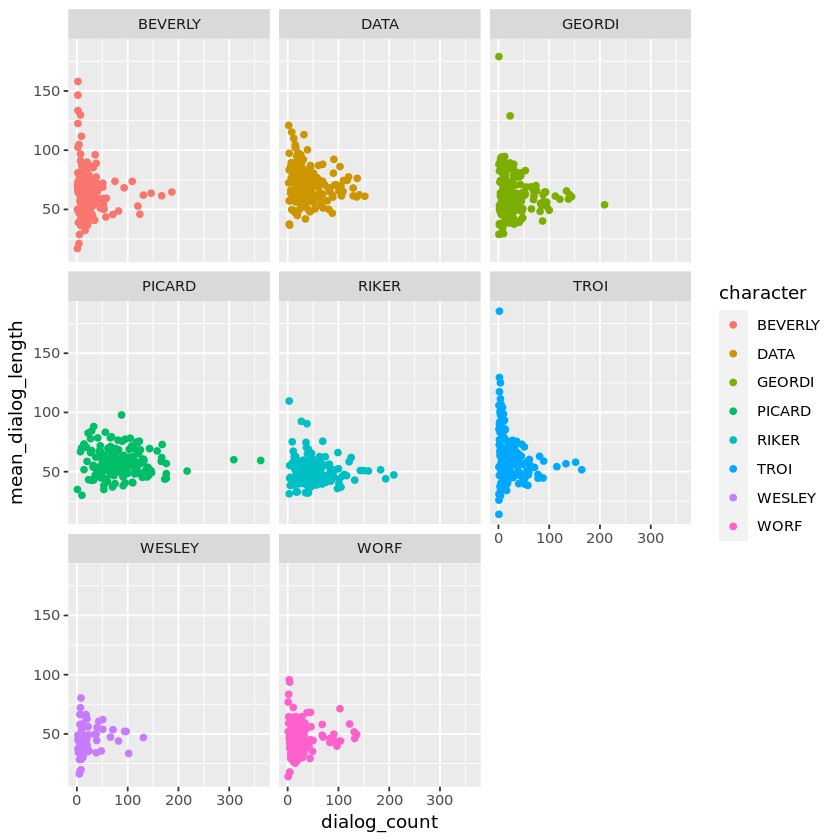

In [2]:
ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + 
    geom_point(aes(color=character)) + 
    facet_wrap(~character)

In [ ]:
Answer:

The plots show how often (per episode) the characters speak along the x-axis and how long 
they speak on average on the y-axis. The way the data clusters helps us understand how relevant 
the characters are for the plot based on their dialog. For characters like Picard, Geordi, Riker, 
and Data, we see averages around 0-100 for mean dialog counts and 25-150 min for dialog lengths, so 
we can reason that these are consistent, key characters in the series. For characters like Wesley 
however, we see not only less data points in the clusters but also points closer to zero, indicating 
either a side character, someone who appears later on in the series or someone who started and did not 
continue. With this reasoning, we can also assume that characters with high y-axis but low x-axis values 
like Beverly or Troi may be supporting roles to the protagonists (or antagonists) with more speaking time and 
frequency as they likely speak less but reveal key information at specific points in the series.

## Question 2
#### a) Compare Beverly's mean dialog per episode vs. mean dialog count per episode from season 1 (episodes 102-126) to season 3 (episodes 149-174) in a table.  
*Hints*:  
-   First, use `filter()` to get - 1) the dialog from only Beverly's character and 2) the episodes within the ranges given.
-   Then, add a season variable using `mutate()` with `case_when()`.
-   To create the means per episode, after your `mutate()` step, you'll need to `group_by()` season and episode number, then you can do your `summarize()` step to get the means by episode. At the end of the `summary()` statement (inside the parenthesis), add `.groups="drop"`. 
-   Then, to get the mean of means, you'll do the same as above, but only grouping by season. 

In [4]:
# Question 2 a) ANSWER
suppressPackageStartupMessages(library(tidyverse))
library(knitr)

tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

bev <- tng %>%
  mutate(
    character = character %>%
      str_replace_all("'S.*$", "") %>%
      str_replace_all(" VOICE$", "") %>%
      str_replace_all("\\.", "") %>%
      str_replace_all("'", "") %>%
      str_replace_all("S COM$", "") %>%
      str_replace_all(" COM$", ""),
    dialog_length = stringr::str_length(dialog)
  ) %>%
  filter(character == "BEVERLY",
         dplyr::between(episode_number, 102, 126) |
           dplyr::between(episode_number, 149, 174)) %>%
  mutate(season = case_when(
    between(episode_number, 102, 126) ~ "Season 1",
    between(episode_number, 149, 174) ~ "Season 3"
  ))

per_episode <- bev %>%
  group_by(season, episode_number) %>%
  summarize(
    `Mean line length` = round(mean(dialog_length), 1),
    `Lines (count)` = n(),
    .groups = "drop"
  ) %>%
  arrange(season, episode_number)

kable(per_episode, align = c("l","r","r","r"),
      caption = "Beverly: per-episode means (Season 1 vs Season 3)")

season_compare <- per_episode %>%
  group_by(season) %>%
  summarize(
    `Mean of episode mean line length` = round(mean(`Mean line length`), 1),
    `Mean lines per episode` = round(mean(`Lines (count)`), 1),
    .groups = "drop"
  )

kable(season_compare, align = c("l","r","r"),
      caption = "Season comparison for Beverly")




Table: Beverly: per-episode means (Season 1 vs Season 3)

|season   | episode_number| Mean line length| Lines (count)|
|:--------|--------------:|----------------:|-------------:|
|Season 1 |            102|             56.7|            31|
|Season 1 |            103|             58.8|            45|
|Season 1 |            104|             55.6|            17|
|Season 1 |            105|             69.2|            10|
|Season 1 |            106|             57.5|            11|
|Season 1 |            107|             36.6|            10|
|Season 1 |            108|             43.6|            57|
|Season 1 |            109|             45.7|            30|
|Season 1 |            110|             50.2|            52|
|Season 1 |            111|             48.0|             9|
|Season 1 |            112|             96.1|            36|
|Season 1 |            113|             36.8|            21|
|Season 1 |            114|             44.5|            23|
|Season 1 |            11



Table: Season comparison for Beverly

|season   | Mean of episode mean line length| Mean lines per episode|
|:--------|--------------------------------:|----------------------:|
|Season 1 |                             56.5|                   25.4|
|Season 3 |                             67.0|                   19.6|

#### b) In class, we talked about this character saying the actress has stated that after she was fired and rehired, the writers began giving her storylines that made her feel like a male character. How is this reflected in our table?

In [ ]:
ANSWER FOR QUESTION 2 B)

Based on our table, we can see that Beverly does in fact have an increase in mean 
line length but a decrease in mean lines per episode. This could reflect a 
"male-like" speaking pattern of less back and forth and more monologues like she 
claims as compared to a less formal, more conversational "female-like" pattern which would 
be reflected in a lower mean line length but a higher mean line count.

## Question 3
Let's compare the vocabulary richness (unique words / total words) of each character. 
#### a) Tokenize dialog into words, remove punctuation, convert to lowercase. Then filter out the stop words in the list below (from https://gist.github.com/sebleier/554280).
*Hint*: Here's a template for that this step should look like:
```
tokens <- YOUR_DATASET %>%
  # Split each dialog into words
  mutate(word_list = str_split(DIALOG_COLUMN, "\\s+")) %>%
  
  # Unnest the list column so each word is a row
  unnest(word_list) %>%
  
  # Clean words
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),  # Remove punctuation
    word = str_to_lower(word)                         # Convert to lowercase
  ) %>%
  
  # Remove empty strings and stopwords
  filter(word != "", !word %in% STOPWORDS)
```

In [5]:
#Question 3A Answer:

# Q3(a): tokenize all characters, clean, remove stopwords; show outputs
suppressPackageStartupMessages(library(tidyverse))
library(knitr)

# 1) Read data from GitHub
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Load stopwords from sebleier gist
stopwords <- readr::read_lines("https://gist.githubusercontent.com/sebleier/554280/raw/") |>
  stringr::str_trim() |>
  discard(~ .x == "")

# 3) Normalize character labels
tng_clean <- tng |>
  mutate(
    character = character |>
      str_replace_all("'S.*$", "") |>
      str_replace_all(" VOICE$", "") |>
      str_replace_all("\\.", "") |>
      str_replace_all("'", "") |>
      str_replace_all("S COM$", "") |>
      str_replace_all(" COM$", "")
  )

# 4) Tokenize, lowercase, strip punctuation, remove stopwords and empties
tokens <- tng_clean |>
  mutate(word_list = str_split(dialog, "\\s+")) |>
  unnest(word_list) |>
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),
    word = str_to_lower(word)
  ) |>
  filter(word != "", !word %in% stopwords) |>
  select(character, episode_number, word)

# ---- Outputs for Q3(a) ----

# Per-character totals after stopword removal (ALL characters)
by_char_totals <- tokens |>
  count(character, name = "total_tokens_after_stopwords") |>
  arrange(desc(total_tokens_after_stopwords))

# Print a readable top slice and then the full table
kable(head(by_char_totals, 30),
      align = c("l","r"),
      caption = "Top 30 characters by token count (after stopword removal)")
print(by_char_totals, n = Inf)  # full per-character table

# Also show how many distinct characters are included
n_chars <- n_distinct(tokens$character)
cat("\nDistinct characters included:", n_chars, "\n")





Table: Top 30 characters by token count (after stopword removal)

|character | total_tokens_after_stopwords|
|:---------|----------------------------:|
|PICARD    |                        79214|
|DATA      |                        45462|
|RIKER     |                        41827|
|GEORDI    |                        31978|
|BEVERLY   |                        22900|
|TROI      |                        19450|
|WORF      |                        18820|
|WESLEY    |                         7601|
|PULASKI   |                         3828|
|Q         |                         3694|
|TASHA     |                         3305|
|GUINAN    |                         2961|
|COMPUTER  |                         2887|
|OBRIEN    |                         2861|
|RO        |                         2342|
|BARCLAY   |                         2337|
|LWAXANA   |                         2320|
|JELLICO   |                         1285|
|LORE      |                         1202|
|KEHLEYR   |                 

# A tibble: 837 × 2
    character                 total_tokens_after_stopwords
    <chr>                                            <int>
  1 PICARD                                           79214
  2 DATA                                             45462
  3 RIKER                                            41827
  4 GEORDI                                           31978
  5 BEVERLY                                          22900
  6 TROI                                             19450
  7 WORF                                             18820
  8 WESLEY                                            7601
  9 PULASKI                                           3828
 10 Q                                                 3694
 11 TASHA                                             3305
 12 GUINAN                                            2961
 13 COMPUTER                                          2887
 14 OBRIEN                                            2861
 15 RO                              

#### b) Count unique words per character. Print a summary table with the following columns: character, total words, unique words, and vocabulary richness.  
*Hint*: Group by character, then use `summarize()` to get what you want. You'll use `n_distinct()` to get the unique word counts. Arrange in descending value of vocabulary richness.

In [6]:
#answer for QUESTION 3 B)

# Q3(b): vocabulary richness per character
suppressPackageStartupMessages(library(tidyverse))
library(knitr)

# 1) Read data from GitHub
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Load stopwords (sebleier gist)
stopwords <- readr::read_lines("https://gist.githubusercontent.com/sebleier/554280/raw/") |>
  stringr::str_trim() |>
  discard(~ .x == "")

# 3) Normalize character labels
tng_clean <- tng |>
  mutate(
    character = character |>
      str_replace_all("'S.*$", "") |>
      str_replace_all(" VOICE$", "") |>
      str_replace_all("\\.", "") |>
      str_replace_all("'", "") |>
      str_replace_all("S COM$", "") |>
      str_replace_all(" COM$", "")
  )

# 4) Tokenize, clean, remove stopwords
tokens <- tng_clean |>
  mutate(word_list = str_split(dialog, "\\s+")) |>
  unnest(word_list) |>
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),
    word = str_to_lower(word)
  ) |>
  filter(word != "", !word %in% stopwords) |>
  select(character, word)

# 5) Vocabulary richness per character
vocab_summary <- tokens |>
  group_by(character) |>
  summarize(
    total_words  = n(),
    unique_words = n_distinct(word),
    vocabulary_richness = unique_words / total_words,
    .groups = "drop"
  ) |>
  arrange(desc(vocabulary_richness))

# Display outputs
kable(head(vocab_summary, 30),
      align = c("l","r","r","r"),
      digits = c(NA, 0, 0, 4),
      caption = "Top 30 characters by vocabulary richness (after stopword removal)")

print(vocab_summary, n = Inf)




Table: Top 30 characters by vocabulary richness (after stopword removal)

|character                 | total_words| unique_words| vocabulary_richness|
|:-------------------------|-----------:|------------:|-------------------:|
|AD LIBBED VOICES          |           7|            7|                   1|
|ADMIRAL SIMONS            |           4|            4|                   1|
|ALANS                     |          14|           14|                   1|
|ALEXANDRA                 |           3|            3|                   1|
|ALIEN                     |          17|           17|                   1|
|ALIEN NURSE               |          14|           14|                   1|
|ALL IN GROUP              |           3|            3|                   1|
|AMERICAN INDIAN           |           2|            2|                   1|
|ANTEDIAN FEMALE           |           4|            4|                   1|
|ANTEDIANS                 |           1|            1|                   1|


# A tibble: 837 × 4
    character                 total_words unique_words vocabulary_richness
    <chr>                           <int>        <int>               <dbl>
  1 AD LIBBED VOICES                    7            7               1    
  2 ADMIRAL SIMONS                      4            4               1    
  3 ALANS                              14           14               1    
  4 ALEXANDRA                           3            3               1    
  5 ALIEN                              17           17               1    
  6 ALIEN NURSE                        14           14               1    
  7 ALL IN GROUP                        3            3               1    
  8 AMERICAN INDIAN                     2            2               1    
  9 ANTEDIAN FEMALE                     4            4               1    
 10 ANTEDIANS                           1            1               1    
 11 ARON                                6            6               1    
 12 B

#### c) Plot total words versus vocab richness. 
-   Use the character names as the "points".
    -   *Hint*: Use `geom_text()` to add the character names as the points.
-   Do not include a legend.
    -   *Hint*: Use `theme()` to remove the legend.
-   Add a title and axis titles.
    -   *Hint*: Use `labs()` to add titles.

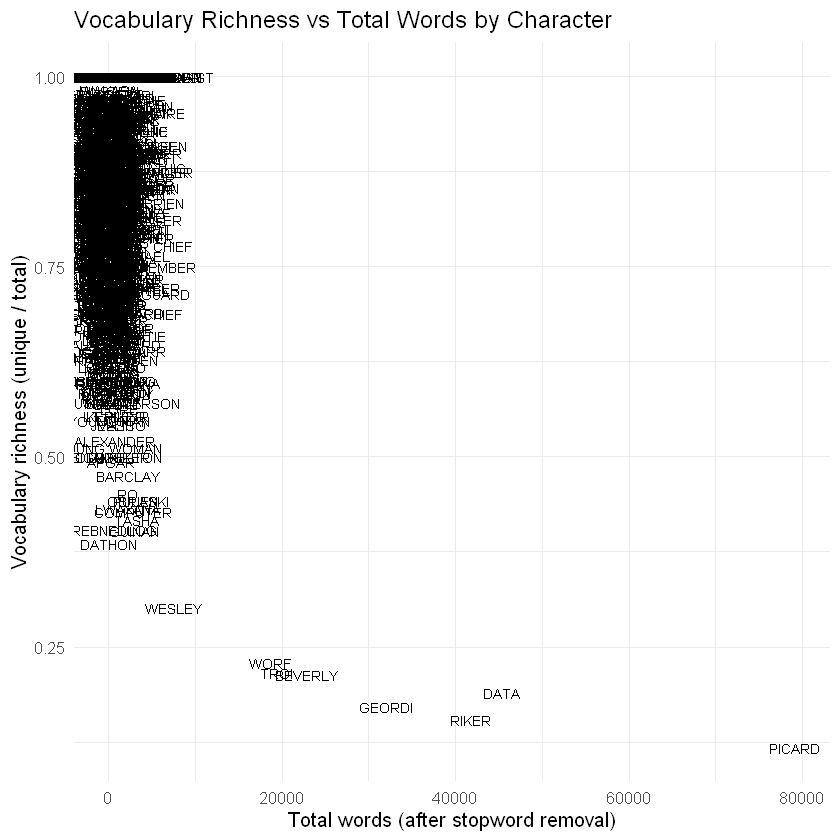

In [7]:
#QUESTION 3 C ANSWER)

# Q3(c): plot total words vs vocabulary richness with text labels
suppressPackageStartupMessages(library(tidyverse))

# 1) Data
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Stopwords (sebleier gist)
stopwords <- readr::read_lines("https://gist.githubusercontent.com/sebleier/554280/raw/") |>
  stringr::str_trim() |>
  discard(~ .x == "")

# 3) Normalize character labels
tng_clean <- tng |>
  mutate(
    character = character |>
      str_replace_all("'S.*$", "") |>
      str_replace_all(" VOICE$", "") |>
      str_replace_all("\\.", "") |>
      str_replace_all("'", "") |>
      str_replace_all("S COM$", "") |>
      str_replace_all(" COM$", "")
  )

# 4) Tokenize, clean, remove stopwords
tokens <- tng_clean |>
  mutate(word_list = str_split(dialog, "\\s+")) |>
  unnest(word_list) |>
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),
    word = str_to_lower(word)
  ) |>
  filter(word != "", !word %in% stopwords) |>
  select(character, word)

# 5) Per-character totals and richness
vocab_summary <- tokens |>
  group_by(character) |>
  summarize(
    total_words  = n(),
    unique_words = n_distinct(word),
    vocabulary_richness = unique_words / total_words,
    .groups = "drop"
  )

# 6) Plot (uses labels as points; no legend)
ggplot(vocab_summary, aes(x = total_words, y = vocabulary_richness, label = character)) +
  geom_text(size = 3) +
  labs(
    title = "Vocabulary Richness vs Total Words by Character",
    x = "Total words (after stopword removal)",
    y = "Vocabulary richness (unique / total)"
  ) +
  theme_minimal(base_size = 12) +
  theme(legend.position = "none")


#### d) Interpret these results. 

In [ ]:
ANSWER FOR QUESTION 3D:

This graph breaks down individual character total word count (excluding stopwords) on the x-axis 
and vocabulary richness, defined as unique words divided by total words, on the y-axis. There is 
a very clear trend as seen by the dark cluster near the 0 x-axis: characters that have a lower word 
count (less than 10000) typically have much higher vocabulary richness (typically over 50%). At the 
same time, we can see that characters such as Picard, Data, Riker, Geordi, Beverly, Wesley, Wore and 
Troi typically have less vocabulary richness despite having a much higher word count than other characters. 
We can assume that these characters are the main characters in the series as they talk more (more word count). 
The more they talk, the less rich vocabulary they are likely to have as they are more likely to repeat words. 
At the same time, characters that talk less are more likely to have richer vocabulary, perhaps due to having 
to speak in a more mysterious or interesting manner to reveal information in the limited time they are on screen, 
but more likely because the ratio of unique to total words is inflated as they do not have enough lines to repeat words.

## Question 4
#### a) Find what episode Wesley left the show as a main character and state it explicitly. Meaning, find the first significant gap where he is not found in more than two episodes in a row. 
*Hint*: It's after season 3 (ended at episode 174), so you can filter out seasons 1-3 and print Wesley's dialog count per episode. Then, scan the table for the gap. 

In [8]:
#QUESTION 4 a) ANSWER:

# Q4(a): Detect first ≥3-episode gap without Wesley after S3 and report the leave episode
suppressPackageStartupMessages(library(tidyverse))

# 1) Read data from GitHub
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Normalize character labels
tng_clean <- tng %>%
  mutate(
    character = character %>%
      str_replace_all("'S.*$", "") %>%
      str_replace_all(" VOICE$", "") %>%
      str_replace_all("\\.", "") %>%
      str_replace_all("'", "") %>%
      str_replace_all("S COM$", "") %>%
      str_replace_all(" COM$", "")
  )

# 3) Wesley dialog counts per episode, seasons 4+ (≥ 175)
eps <- tibble(episode_number = seq(175, max(tng_clean$episode_number, na.rm = TRUE)))
wes_counts <- tng_clean %>%
  filter(episode_number >= 175, character == "WESLEY") %>%
  count(episode_number, name = "wesley_lines") %>%
  right_join(eps, by = "episode_number") %>%
  mutate(wesley_lines = replace_na(wesley_lines, 0)) %>%
  arrange(episode_number)

# 4) Find first run of ≥3 consecutive zeros
is_zero <- wes_counts$wesley_lines == 0
r <- rle(is_zero)
pos <- which(r$values & r$lengths >= 3)[1]

if (is.na(pos)) {
  cat("No ≥3-episode gap found after episode 174.\n")
} else {
  start_index <- sum(r$lengths[seq_len(pos - 1)]) + 1
  gap_start_episode <- wes_counts$episode_number[start_index]
  leave_episode <- wes_counts$episode_number[start_index - 1]
  
  cat("First ≥3-episode gap without Wesley starts at episode:", gap_start_episode, "\n")
  cat("Wesley leaves as a main character at episode:", leave_episode, "\n\n")
  
  # Show a small window around the transition
  window <- wes_counts %>%
    filter(between(episode_number, leave_episode - 3, gap_start_episode + 3))
  print(window, n = nrow(window))
}


First ≥3-episode gap without Wesley starts at episode: 184 
Wesley leaves as a main character at episode: 183 

# A tibble: 8 × 2
  episode_number wesley_lines
           <dbl>        <int>
1            180            0
2            181            2
3            182            0
4            183           94
5            184            0
6            185            0
7            186            0
8            187            0


#### b) After Wesley leaves the main cast, in which episodes does he make cameo appearances?

In [9]:
#Answer QUESTION 4 B)

# Q4(b): Episodes with Wesley after leaving main cast (post-183)
suppressPackageStartupMessages(library(tidyverse))

tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

tng_clean <- tng %>%
  mutate(
    character = character %>%
      str_replace_all("'S.*$", "") %>%
      str_replace_all(" VOICE$", "") %>%
      str_replace_all("\\.", "") %>%
      str_replace_all("'", "") %>%
      str_replace_all("S COM$", "") %>%
      str_replace_all(" COM$", "")
  )

cameos <- tng_clean %>%
  filter(episode_number > 183, character == "WESLEY") %>%
  count(episode_number, name = "wesley_lines") %>%
  arrange(episode_number)

print(cameos, n = nrow(cameos))
cat("\nEpisode numbers:", paste(cameos$episode_number, collapse = ", "), "\n")


# A tibble: 4 × 2
  episode_number wesley_lines
           <dbl>        <int>
1            206          131
2            219           71
3            263           18
4            272           97

Episode numbers: 206, 219, 263, 272 


#### c) Dig back into the data. Print:
-   Wesley's last piece of dialog before he left the main cast.
-   Wesley's last piece of dialog ever.  
  
*Hint*: To do this, you'll need to filter the `dialogs_fixed` data set to Welsey's lines and the episode number, and use `slice_tail(n = 1)` to get the last observation.

In [11]:
#Question 4C ANSWER:

suppressPackageStartupMessages(library(tidyverse))

# 1) Read data from GitHub
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Preserve original row order, normalize character labels
tng_fixed <- tng %>%
  mutate(
    row_id = row_number(),
    character = character %>%
      str_replace_all("'S.*$", "") %>%  # e.g., WESLEY'S -> WESLEY
      str_replace_all(" VOICE$", "") %>%
      str_replace_all("\\.", "") %>%
      str_replace_all("'", "") %>%
      str_replace_all("S COM$", "") %>%
      str_replace_all(" COM$", "")
  )

# 3) Filter to Wesley only
wes <- tng_fixed %>% filter(character == "WESLEY")

# 4) Find last main-cast episode from Q4(a): 183.
#    Get Wesley's final line at or before ep 183.
last_maincast <- wes %>%
  filter(episode_number <= 183) %>%
  arrange(episode_number, row_id) %>%
  slice_tail(n = 1) %>%
  select(episode_number, dialog)

# 5) Find Wesley's final line in the whole dataset
last_ever <- wes %>%
  arrange(episode_number, row_id) %>%
  slice_tail(n = 1) %>%
  select(episode_number, dialog)

# ---- Outputs ----
cat("Wesley’s last line BEFORE leaving main cast:\n")
print(last_maincast)

cat("\nWesley’s LAST line ever:\n")
print(last_ever)


Wesley’s last line BEFORE leaving main cast:
# A tibble: 1 × 2
  episode_number dialog     
           <dbl> <chr>      
1            183 I can walk.

Wesley’s LAST line ever:
# A tibble: 1 × 2
  episode_number dialog        
           <dbl> <chr>         
1            272 Good-bye, Mom.


## Question 5
Create a heatmap with `dialog_len_per_ep` showing mean dialog length per episode for each character. Sort the characters on the y-axis by their overall mean dialog length, with the lowest on top using a factor. Add a title and an axis title. 
*Hints*:
For the factor:
1. Compute overall mean (mean of mean) dialog length per character (`group_by()` then `summarize()`), and arrange the overall mean in ascending order. Add `pull(character)` to the end of this step so that you can use character as a factor in the next step. Store all of this in a new tibble.
2. Convert character to factor with this order. On `dialog_len_per_ep`, you'll use a mutate statement to add the factor `(mutate(character = factor(character, levels = DATAFROMHINT1))`.
3. Create heatmap using `geom_tile()`.
4. If you want nicer colors, you can add `scale_fill_viridis_c()` (or another color scale) to your ggplot statement. **Not required**, but fun to mess around with!

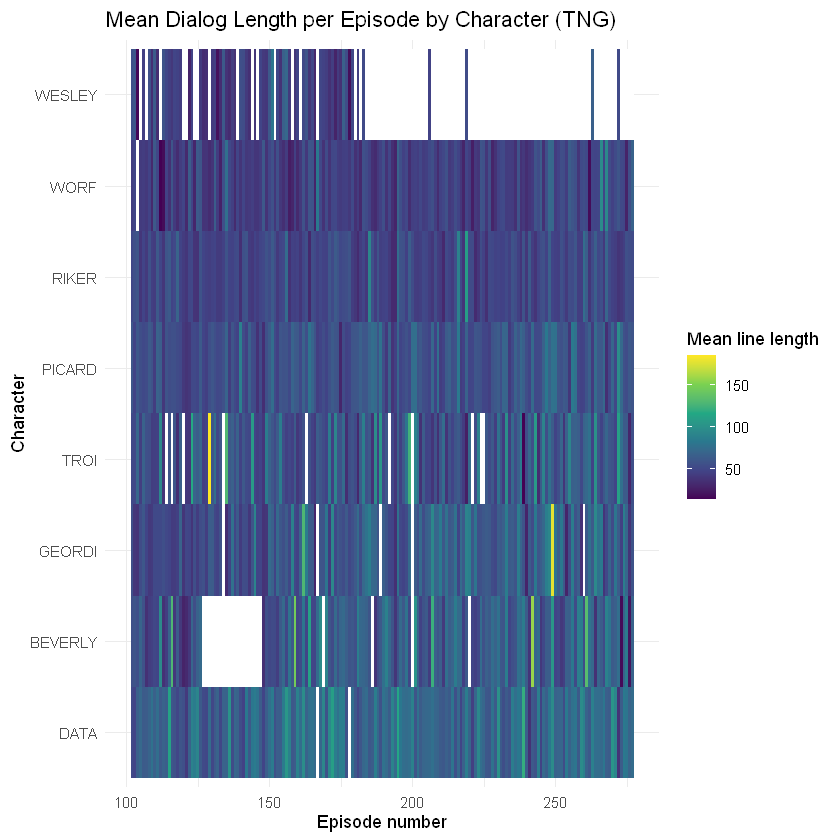

In [13]:
# Q5 (fixed): Heatmap with lowest overall mean on TOP
suppressPackageStartupMessages(library(tidyverse))

# 1) Data
tng <- readr::read_csv(
  "https://raw.githubusercontent.com/rjenki/BIOS512/main/lecture8/tng.csv",
  show_col_types = FALSE
)

# 2) Clean labels; keep main cast
main_chars <- c("PICARD","RIKER","DATA","TROI","BEVERLY","WORF","WESLEY","GEORDI")
dialogs_fixed <- tng %>%
  mutate(
    character = character %>%
      str_replace_all("'S.*$", "") %>%
      str_replace_all(" VOICE$", "") %>%
      str_replace_all("\\.", "") %>%
      str_replace_all("'", "") %>%
      str_replace_all("S COM$", "") %>%
      str_replace_all(" COM$", ""),
    dialog_length = stringr::str_length(dialog)
  ) %>%
  filter(character %in% main_chars)

# 3) Per-episode mean dialog length
dialog_len_per_ep <- dialogs_fixed %>%
  group_by(character, episode_number) %>%
  summarize(mean_dialog_length = mean(dialog_length), .groups = "drop")

# 4) Order by overall mean (ascending), then REVERSE levels so lowest is on top
char_means <- dialog_len_per_ep %>%
  group_by(character) %>%
  summarize(overall_mean = mean(mean_dialog_length), .groups = "drop") %>%
  arrange(overall_mean)

dialog_len_per_ep <- dialog_len_per_ep %>%
  mutate(character = factor(character, levels = rev(char_means$character)))

# (optional) fill missing episode-character combos so gaps show as white
dialog_len_per_ep <- dialog_len_per_ep %>%
  tidyr::complete(character, episode_number, fill = list(mean_dialog_length = NA_real_))

# 5) Heatmap
ggplot(dialog_len_per_ep, aes(x = episode_number, y = character, fill = mean_dialog_length)) +
  geom_tile() +
  scale_fill_viridis_c(na.value = "white") +
  labs(
    title = "Mean Dialog Length per Episode by Character (TNG)",
    x = "Episode number",
    y = "Character",
    fill = "Mean line length"
  ) +
  theme_minimal()
